### `Importing necessary libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### `Reading data`

In [2]:
data = pd.read_csv("../Dataset/50_Startups.csv")

In [3]:
data

,R&D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### `Analysing the data`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
data.describe()

,R&D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 R&D_Spend  Administration  Marketing_Spend    Profit
R&D_Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing_Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [7]:
# Define formulas
formulas = [
    "Profit ~ Administration",
    "Profit ~ Marketing_Spend + Administration",
    "Profit ~ Marketing_Spend + Administration + Q('R&D_Spend')"
]

# Fit models and print summaries
for i, formula in enumerate(formulas, start=1):
    model = sm.OLS.from_formula(formula, data=data)
    fit = model.fit()
    print(f"Model {i} Summary:")
    print(fit.summary())
    print("\n")

Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 24 May 2024   Prob (F-statistic):              0.162
Time:                        09:32:02   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04  

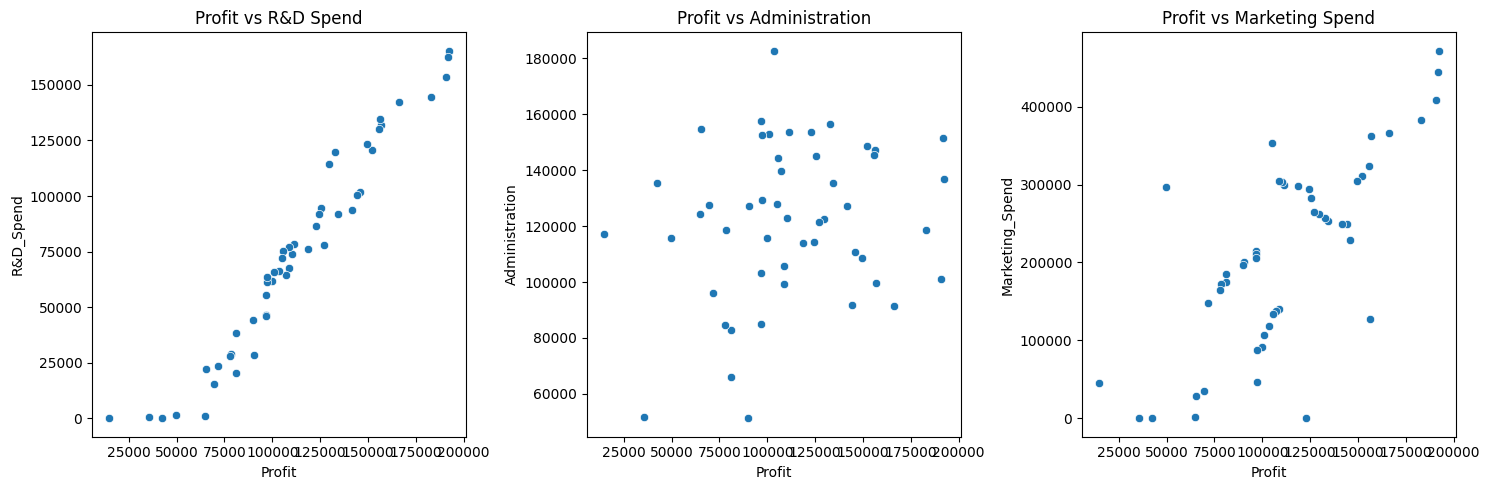

In [8]:
# Create a figure and axis objects
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Profit vs R&D Spend
sns.scatterplot(y='R&D_Spend', x='Profit', data=data, ax=axes[0])
axes[0].set_title('Profit vs R&D Spend')

# Plot Profit vs Administration
sns.scatterplot(y='Administration', x='Profit', data=data, ax=axes[1])
axes[1].set_title('Profit vs Administration')

# Plot Profit vs Marketing Spend
sns.scatterplot(y='Marketing_Spend', x='Profit', data=data, ax=axes[2])
axes[2].set_title('Profit vs Marketing Spend')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
print("Missing values before imputation:\n", data.isnull().sum())

Missing values before imputation:
 R&D_Spend          0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64


### `Data Preprocessing and Splitting`

In [10]:
X = data.iloc[ : , 0:3]
Y = data.iloc[ : , -1]

In [15]:
X

,R&D_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [16]:
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(Y.values.reshape(-1, 1))

In [18]:
X_scaled

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [19]:
y_scaled

array([[ 2.01120333],
       [ 1.99942997],
       [ 1.98084225],
       [ 1.77662724],
       [ 1.35774012],
       [ 1.12724963],
       [ 1.10548055],
       [ 1.09620987],
       [ 1.00746967],
       [ 0.94602247],
       [ 0.85484675],
       [ 0.80816756],
       [ 0.74115484],
       [ 0.55874952],
       [ 0.51602637],
       [ 0.44871967],
       [ 0.3754357 ],
       [ 0.33477114],
       [ 0.307116  ],
       [ 0.26977265],
       [ 0.16193522],
       [-0.01753384],
       [-0.04161264],
       [-0.08216943],
       [-0.08672946],
       [-0.11549309],
       [-0.15736664],
       [-0.17554233],
       [-0.21879755],
       [-0.27588222],
       [-0.3026246 ],
       [-0.36412744],
       [-0.36552389],
       [-0.38178711],
       [-0.38344421],
       [-0.38929092],
       [-0.53393161],
       [-0.5529549 ],
       [-0.77149734],
       [-0.77709368],
       [-0.84641135],
       [-0.85746568],
       [-1.01536466],
       [-1.05896021],
       [-1.17320899],
       [-1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.15, random_state=45)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

### `Fitting different Models`

In [21]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
XGboostreg = ensemble.GradientBoostingRegressor(**params)
XGboostreg.fit(X_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [23]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
linear_reg_pred = linear_reg.predict(X_test)
gradient_reg_pred = XGboostreg.predict(X_test)
decision_tree_pred = decision_tree_reg.predict(X_test)

### `Calculating different Regression Metrics`

In [25]:
# Mean Squared Error (MSE)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
gradient_reg_mse = mean_squared_error(y_test, gradient_reg_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)

# Mean Absolute Error (MAE)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
gradient_reg_mae = mean_absolute_error(y_test, gradient_reg_pred)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_pred)

# R-squared (R2)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
gradient_reg_r2 = r2_score(y_test, gradient_reg_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)

### `Choosing best model according to Regression Metrics`

In [26]:
models = {'Multiple Linear Regression': {'MSE': linear_reg_mse, 'MAE': linear_reg_mae, 'R2': linear_reg_r2},
          'Gradient Boosting Regression': {'MSE': gradient_reg_mse, 'MAE': gradient_reg_mae, 'R2':gradient_reg_r2},
          'Decision Tree Regression': {'MSE': decision_tree_mse, 'MAE': decision_tree_mae, 'R2':decision_tree_r2}}

In [28]:
for model in models:
     print(f"Metrics of {model} model is: ", models[model])

Metrics of Multiple Linear Regression model is:  {'MSE': 0.020744206029190554, 'MAE': 0.1318548053584457, 'R2': 0.9827789020862663}
Metrics of Gradient Boosting Regression model is:  {'MSE': 0.06590558925493431, 'MAE': 0.18819564950624237, 'R2': 0.9452875369621543}
Metrics of Decision Tree Regression model is:  {'MSE': 0.02348896007247095, 'MAE': 0.125096354475731, 'R2': 0.9805003054476706}


In [29]:
best_model = min(models, key=lambda x: models[x]['MSE'])

In [30]:
print("Best model:", best_model)
print("Metrics for the best model:")
print(models[best_model])

Best model: Multiple Linear Regression
Metrics for the best model:
{'MSE': 0.020744206029190554, 'MAE': 0.1318548053584457, 'R2': 0.9827789020862663}


In [31]:
# For Linear Regression
linear_coefficients = linear_reg.coef_  # Coefficients of the features
linear_intercept = linear_reg.intercept_[0]  # Intercept

print("Equation for the Multiple Linear Regression Model is:")
print(linear_intercept ,"+", linear_coefficients[0][0],"x1 +", linear_coefficients[0][1],"x2 +", linear_coefficients[0][2],"x3")

Equation for the Multiple Linear Regression Model is:
0.004722913469563481 + 0.9182075705177525 x1 + -0.015084505588670534 x2 + 0.07592319171196886 x3
